**Nome:** Thatielen Oliveira Pereira <br>
**Matrícula:** 1515080618

## IMPORTAÇÃO DE BIBLIOTECAS

In [44]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

## FUNÇÕES AUXILIARES

In [58]:
def separar_saidas(registros):
    saida = []
    for registro in registros:
        saida.append(registro[2])
    saidas = np.array(saida,dtype=int)
    return saidas

def separar_entradas(registros):
    entrada = []
    for registro in registros:
        entrada.append([])
        entrada[-1].append(-1)
        entrada[-1].append(registro[0])
        entrada[-1].append(registro[1])
    entradas = np.array(entrada,dtype=float)
    return entradas

def criar_cores(saidas):
    cores = []
    for saida in saidas:
        if(saida == 0):
            cores.append('red')
        else:
            cores.append('blue')
    return cores

def aleatoriza(entradas, saidas):
    entrada_aleatoria, saida_aleatoria = np.array([]), np.array([])
    tam = len(entradas)
    
    for i in range(tam): 
        index = random.randint(0, len(entradas) - 1)

        entrada_aleatoria = np.append(entrada_aleatoria, entradas[index])
        saida_aleatoria = np.append(saida_aleatoria, saidas[index])

        entradas = np.delete(entradas, index, 0)
        saidas = np.delete(saidas, index, 0)

    entrada_aleatoria = entrada_aleatoria.reshape(entrada_aleatoria.size // 3, 3)
    return (entrada_aleatoria, saida_aleatoria)

def acuracia(vp, vn, fp, fn):
    return (vp + vn) / (vp + vn + fp + fn)

def precisao(vp, vn, fp, fn):
    return vp / (vp + fp)

def revocacao(vp, vn, fp, fn):
    return vp / (vp + fn)

def f1(vp, vn, fp, fn):
    r = revocacao(vp, vn, fp, fn)
    p = precisao(vp, vn, fp, fn)
    
    return 2 * (r * p) / (r + p) 

## PERCEPTRON RANDOMIZADO

In [45]:
def funcao_ativacao(soma, teta):
    if (soma >= teta):
        return 1
    return 0

# Função que realiza o produto escalar de um regitro com os pesos
def calculo_saida(registro, pesos, teta):
    soma = registro.dot(pesos)
    return funcao_ativacao(soma, teta)

# Função de treinamento que é executada até que não haja erro
def treinamento(entradas, saidas, pesos, taxa_aprendizagem, teta, max_it):
    # Aleatorização das entradas
    entradas, saidas = aleatoriza(entradas, saidas)
    # Inicialização de variáveis
    epocas = 1
    ajustes_por_epoca = []
    saidas_treinamento = np.array([], dtype=int)
    # Exibição inicial dos pesos
    print("Peso:", pesos)

    # Verficando condição inicial para iniciar o loop de treinamento 
    
    # Loop que garante a execução até que não haja erro
    while (np.array_equal(saidas, saidas_treinamento) == False and epocas < max_it):
        ajustes_pesos = 0
        saidas_treinamento = np.array([], dtype=int)
        # Loop para percorrer todas as entradas/saídas
        for i in range(0, len(entradas), 1):
            alterou_pesos = False
            # Cálculo da saída para a entrada atual aplicando-se os pesos
            saida_calculada = calculo_saida(np.asarray(entradas[i]), pesos, teta)
            # Cálculo do erro da saída
            erro = saidas[i] - saida_calculada
            # Salvamento da saída
            saidas_treinamento = np.append(saidas_treinamento, saida_calculada)
            # Loop para atualização do vetor de pesos
            for j in range(0, len(pesos), 1):
                # Cálculo do novo peso
                aux = pesos[j] + (taxa_aprendizagem * entradas[i][j] * erro)
                # Contagem de ajustes dos pesos da época caso haja mudança de valor
                if(aux != pesos[j]):
                    ajustes_pesos += 1
                    alterou_pesos = True
                pesos[j] = aux
            # Exibe os pesos casa haja alteração
            if(alterou_pesos == True):
                print("Pesos: ", pesos)
        # Exibe o número de ajustes de pesos da época
        print("%d ajustes no vetor de pesos na época %d" %(ajustes_pesos, epocas))
        # Guarda o total de ajustes por época
        ajustes_por_epoca.append(ajustes_pesos)
        epocas += 1

    return pesos, epocas, ajustes_por_epoca, saidas_treinamento

## LEITURA DO DATASET

In [30]:
# Leitura do arquivo dataHoldout.txt
data = np.fromfile("datasets/dataHoldout.txt", dtype=float)
print(data.shape)

(2400,)


## TRATAMENTO DO DATASET

In [31]:
# Redimensionamento do array
registros = data.reshape(data.size//3, 3)
print(registros.shape)
print()

(800, 3)



In [18]:
# Criação de um array das saídas
saidas = separar_saidas(registros)
print(saidas.shape)

(800,)


In [32]:
# Criação de um array das entradas
entradas = separar_entradas(registros)
print(entradas.shape)

(800, 3)


### Primeiro gráfico: mostrando que o problema não é linearmente separável

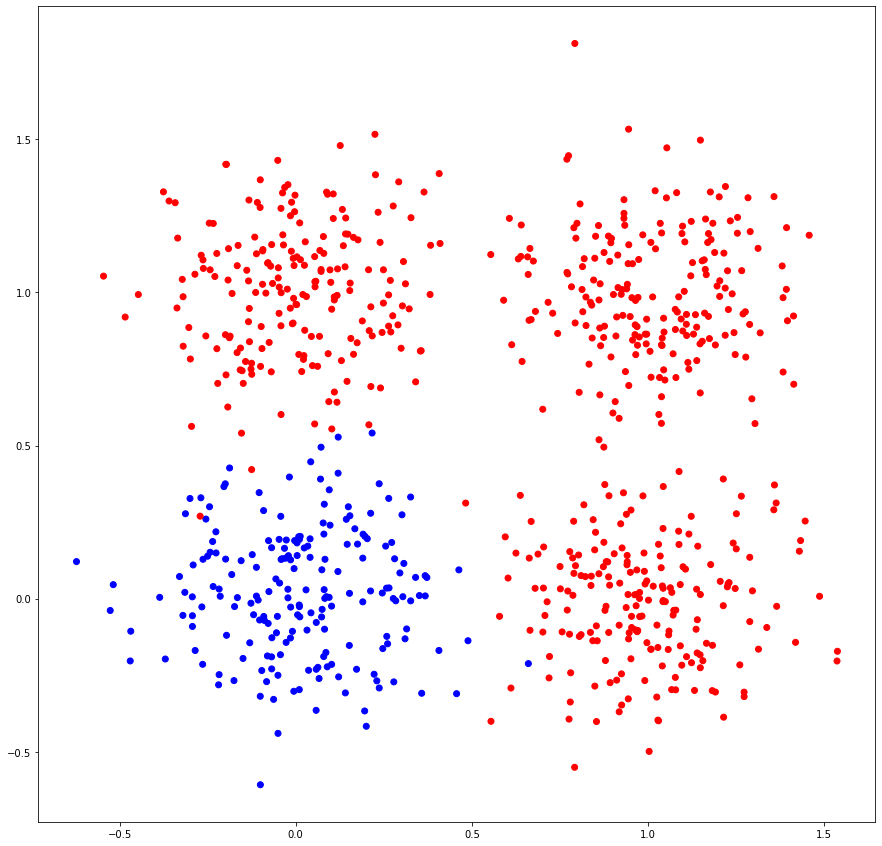

In [33]:
# Criando a lista de cores
cores = criar_cores(saidas)

# Criação do gráfico
plt.rcParams['figure.figsize']=(15,15)
plt.scatter(entradas[:,1], entradas[:,2], marker='o',color=cores)
plt.show()

Desta forma, é possível observar que apenas uma reta não é capaz de separar todos os exemplos do conjunto de dados, sem que exemplos com diferentes rótulos se misturem, sendo abordado melhor a seguir.  

## Separação de Dados

In [34]:
entrada_aleatoria, saida_aleatoria = aleatoriza(entradas, saidas)

**Holdout 70 / 30**

In [35]:
lim = int(len(entrada_aleatoria) * 0.7)
x_treino, y_treino = entrada_aleatoria[:lim], saida_aleatoria[:lim]
x_teste, y_teste = entrada_aleatoria[lim:], saida_aleatoria[lim:]

print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(560, 3) (240, 3) (560,) (240,)


## APRENDIZADO SUPERVISIONADO DO NEURÔNIO PERCEPTRON

In [36]:
# Inicialização das variáveis
taxa_aprendizagem = 0.1
teta = 0
pesos = np.random.uniform(-0.5, 0.5, entradas.shape[1])
print(pesos)

[-0.23462553  0.04200026  0.38884386]


In [37]:
# Treinamento do perceptron
pesos, epocas, ajustes_por_epoca, s = treinamento(x_treino, y_treino, pesos, taxa_aprendizagem, teta, 100)

Peso: [-0.23462553  0.04200026  0.38884386]
Pesos:  [-0.13462553  0.0515846   0.30716765]
Pesos:  [-0.03462553 -0.04696872  0.2736043 ]
Pesos:  [ 0.06537447 -0.16733124  0.1697854 ]
Pesos:  [-0.03462553 -0.15984432  0.16629799]
Pesos:  [-0.13462553 -0.13336185  0.16982146]
Pesos:  [-0.03462553 -0.13304604  0.04346408]
Pesos:  [ 0.06537447 -0.11975934 -0.0867079 ]
Pesos:  [-0.03462553 -0.11157952 -0.09666392]
Pesos:  [-0.13462553 -0.07484961 -0.08914901]
Pesos:  [-0.03462553 -0.1688842  -0.10022535]
Pesos:  [-0.13462553 -0.12258006 -0.09081988]
Pesos:  [-0.03462553 -0.2062304  -0.07982182]
Pesos:  [ 0.06537447 -0.17427576 -0.16226863]
Pesos:  [-0.03462553 -0.16222292 -0.10950719]
Pesos:  [-0.13462553 -0.13384006 -0.11019639]
Pesos:  [-0.03462553 -0.13390541 -0.2063352 ]
Pesos:  [-0.13462553 -0.10583924 -0.19330384]
Pesos:  [-0.03462553 -0.20730623 -0.197383  ]
Pesos:  [-0.13462553 -0.18976863 -0.17955644]
Pesos:  [-0.03462553 -0.2500347  -0.18629002]
Pesos:  [-0.13462553 -0.18400792 -0.

Pesos:  [-0.23462553 -0.52725232 -0.44942621]
84 ajustes no vetor de pesos na época 14
Pesos:  [-0.33462553 -0.50598697 -0.42152706]
Pesos:  [-0.23462553 -0.49617993 -0.51038983]
Pesos:  [-0.33462553 -0.44987579 -0.50098436]
Pesos:  [-0.23462553 -0.53352613 -0.48998631]
Pesos:  [-0.13462553 -0.50157149 -0.57243311]
Pesos:  [-0.23462553 -0.48951866 -0.51967167]
Pesos:  [-0.13462553 -0.57488363 -0.47956051]
Pesos:  [-0.23462553 -0.53812925 -0.4786523 ]
Pesos:  [-0.13462553 -0.48356749 -0.58397899]
Pesos:  [-0.23462553 -0.46679171 -0.56114792]
Pesos:  [-0.33462553 -0.45961109 -0.51167955]
Pesos:  [-0.23462553 -0.44712074 -0.58496283]
Pesos:  [-0.33462553 -0.42544559 -0.53086512]
Pesos:  [-0.23462553 -0.52453064 -0.50413746]
Pesos:  [-0.13462553 -0.50913315 -0.55820022]
Pesos:  [-0.23462553 -0.49376149 -0.53112214]
Pesos:  [-0.13462553 -0.5491799  -0.49108883]
Pesos:  [-0.23462553 -0.53943672 -0.4670866 ]
Pesos:  [-0.33462553 -0.50927785 -0.4396973 ]
Pesos:  [-0.23462553 -0.48998549 -0.502

Pesos:  [-0.33462553 -0.50339038 -0.53656267]
Pesos:  [-0.23462553 -0.48359856 -0.60964039]
Pesos:  [-0.13462553 -0.54468515 -0.58046825]
Pesos:  [-0.23462553 -0.52565327 -0.56721717]
Pesos:  [-0.13462553 -0.60357714 -0.53347925]
87 ajustes no vetor de pesos na época 28
Pesos:  [-0.23462553 -0.57709466 -0.52995578]
Pesos:  [-0.33462553 -0.55582931 -0.50205663]
Pesos:  [-0.23462553 -0.52387467 -0.58450344]
Pesos:  [-0.33462553 -0.51182183 -0.53174199]
Pesos:  [-0.23462553 -0.6029229  -0.50514684]
Pesos:  [-0.13462553 -0.54836113 -0.61047353]
Pesos:  [-0.23462553 -0.53158536 -0.58764247]
Pesos:  [-0.33462553 -0.50605794 -0.57047088]
Pesos:  [-0.23462553 -0.49115669 -0.64077911]
Pesos:  [-0.33462553 -0.46948154 -0.58668139]
Pesos:  [-0.23462553 -0.56856659 -0.55995374]
Pesos:  [-0.13462553 -0.5531691  -0.61401649]
Pesos:  [-0.23462553 -0.53779744 -0.58693842]
Pesos:  [-0.13462553 -0.59321585 -0.5469051 ]
Pesos:  [-0.23462553 -0.58347268 -0.52290288]
Pesos:  [-0.33462553 -0.55331381 -0.495

Pesos:  [-0.33462553 -0.53433704 -0.48085816]
Pesos:  [-0.23462553 -0.50212657 -0.58512543]
Pesos:  [-0.13462553 -0.48960339 -0.62728349]
Pesos:  [-0.23462553 -0.5096129  -0.58977192]
Pesos:  [-0.13462553 -0.60993285 -0.53991186]
Pesos:  [-0.23462553 -0.58269458 -0.52155247]
Pesos:  [-0.33462553 -0.57067419 -0.48056266]
Pesos:  [-0.23462553 -0.54515556 -0.56635248]
Pesos:  [-0.33462553 -0.54090222 -0.52165305]
Pesos:  [-0.23462553 -0.5211104  -0.59473078]
Pesos:  [-0.33462553 -0.48388744 -0.58780031]
Pesos:  [-0.23462553 -0.54497403 -0.55862817]
84 ajustes no vetor de pesos na época 42
Pesos:  [-0.33462553 -0.52370868 -0.53072902]
Pesos:  [-0.23462553 -0.49175404 -0.61317583]
Pesos:  [-0.33462553 -0.4797012  -0.56041438]
Pesos:  [-0.23462553 -0.53996728 -0.56714796]
Pesos:  [-0.33462553 -0.4739405  -0.58833904]
Pesos:  [-0.23462553 -0.56504157 -0.56174388]
Pesos:  [-0.33462553 -0.53951415 -0.5445723 ]
Pesos:  [-0.23462553 -0.5270238  -0.61785558]
Pesos:  [-0.33462553 -0.50534865 -0.563

Pesos:  [-0.13462553 -0.58509191 -0.55659805]
Pesos:  [-0.23462553 -0.55785364 -0.53823865]
Pesos:  [-0.33462553 -0.54583325 -0.49724884]
Pesos:  [-0.23462553 -0.52031462 -0.58303866]
Pesos:  [-0.33462553 -0.51606128 -0.53833924]
Pesos:  [-0.23462553 -0.49626946 -0.61141696]
Pesos:  [-0.13462553 -0.55735606 -0.58224482]
Pesos:  [-0.23462553 -0.53832417 -0.56899374]
Pesos:  [-0.13462553 -0.61624804 -0.53525583]
81 ajustes no vetor de pesos na época 56
Pesos:  [-0.23462553 -0.58976556 -0.53173235]
Pesos:  [-0.33462553 -0.56850021 -0.5038332 ]
Pesos:  [-0.23462553 -0.53654557 -0.58628001]
Pesos:  [-0.33462553 -0.52449274 -0.53351857]
Pesos:  [-0.23462553 -0.49078117 -0.62844605]
Pesos:  [-0.13462553 -0.57614614 -0.58833489]
Pesos:  [-0.23462553 -0.53939176 -0.58742668]
Pesos:  [-0.33462553 -0.51386435 -0.57025509]
Pesos:  [-0.23462553 -0.49896309 -0.64056332]
Pesos:  [-0.33462553 -0.47728795 -0.5864656 ]
Pesos:  [-0.23462553 -0.57637299 -0.55973794]
Pesos:  [-0.13462553 -0.56097551 -0.613

Pesos:  [-0.23462553 -0.49748301 -0.5097832 ]
Pesos:  [-0.33462553 -0.47108885 -0.47703232]
Pesos:  [-0.23462553 -0.45856568 -0.51919037]
Pesos:  [-0.13462553 -0.55888562 -0.46933031]
Pesos:  [-0.23462553 -0.53164735 -0.45097091]
Pesos:  [-0.33462553 -0.51962696 -0.40998111]
Pesos:  [-0.23462553 -0.49410834 -0.49577092]
Pesos:  [-0.33462553 -0.489855   -0.4510715 ]
Pesos:  [-0.23462553 -0.47006317 -0.52414923]
Pesos:  [-0.13462553 -0.53114977 -0.49497709]
Pesos:  [-0.23462553 -0.51211788 -0.48172601]
93 ajustes no vetor de pesos na época 71
Pesos:  [-0.33462553 -0.49085253 -0.45382686]
Pesos:  [-0.23462553 -0.45889789 -0.53627366]
Pesos:  [-0.33462553 -0.44684505 -0.48351222]
Pesos:  [-0.23462553 -0.50711113 -0.4902458 ]
Pesos:  [-0.33462553 -0.49993051 -0.44077742]
Pesos:  [-0.23462553 -0.48744015 -0.51406071]
Pesos:  [-0.33462553 -0.465765   -0.45996299]
Pesos:  [-0.23462553 -0.45036752 -0.51402574]
Pesos:  [-0.13462553 -0.50578593 -0.47399243]
Pesos:  [-0.23462553 -0.49604275 -0.449

Pesos:  [-0.33462553 -0.50502139 -0.42115186]
Pesos:  [-0.23462553 -0.49521436 -0.51001463]
Pesos:  [-0.33462553 -0.44891022 -0.50060916]
Pesos:  [-0.23462553 -0.53256056 -0.4896111 ]
Pesos:  [-0.13462553 -0.50060592 -0.57205791]
Pesos:  [-0.23462553 -0.48855308 -0.51929647]
Pesos:  [-0.13462553 -0.57391805 -0.4791853 ]
Pesos:  [-0.23462553 -0.53716368 -0.47827709]
Pesos:  [-0.13462553 -0.48260191 -0.58360378]
Pesos:  [-0.23462553 -0.46582614 -0.56077272]
Pesos:  [-0.33462553 -0.45864552 -0.51130435]
Pesos:  [-0.23462553 -0.44615516 -0.58458763]
Pesos:  [-0.33462553 -0.42448001 -0.53048991]
Pesos:  [-0.23462553 -0.52356506 -0.50376226]
Pesos:  [-0.13462553 -0.50816757 -0.55782501]
Pesos:  [-0.23462553 -0.49279591 -0.53074694]
Pesos:  [-0.13462553 -0.54821432 -0.49071362]
Pesos:  [-0.23462553 -0.53847115 -0.4667114 ]
Pesos:  [-0.33462553 -0.50831228 -0.4393221 ]
Pesos:  [-0.23462553 -0.48901992 -0.50190413]
Pesos:  [-0.33462553 -0.46262576 -0.46915325]
Pesos:  [-0.23462553 -0.45010258 -

In [38]:
print("Total de Épocas: ", epocas)
print("Pesos finais: ", pesos)
print("Total de ajustes de pesos:", sum(ajustes_por_epoca))

Total de Épocas:  100
Pesos finais:  [-0.13462553 -0.58023336 -0.43907194]
Total de ajustes de pesos: 8907


## Itens 1, 2 e 3

In [48]:
# Cálculo das saídas previstas
saidas_treino, saidas_teste = [], []

for i in range(len(x_treino)):
    saidas_treino.append(calculo_saida(np.asarray(x_treino[i]), pesos, teta))
    
for i in range(len(x_teste)):
    saidas_teste.append(calculo_saida(np.asarray(x_teste[i]), pesos, teta))

### Criação da Matriz de Confusão para Treino

In [64]:
vp, vn, fp, fn = 0, 0, 0, 0

for i in range(len(saidas_treino)):
    if (y_treino[i] == 0):
        if (saidas_treino[i] == 0):
            vn += 1
        else:
            fp += 1
    else:
        if (saidas_treino[i] == 1):
            vp += 1
        else:
            fn += 1

### Métricas para Treino

In [65]:
print("Acurácia:", acuracia(vp, vn, fp, fn))
print("Precisão:", precisao(vp, vn, fp, fn))
print("Revocação:", revocacao(vp, vn, fp, fn))
print("F1:", f1(vp, vn, fp, fn))

Acurácia: 0.9303571428571429
Precisão: 0.9907407407407407
Revocação: 0.7379310344827587
F1: 0.8458498023715415


## Item 4

### Criação da Matriz de Confusão para Teste

In [62]:
vp, vn, fp, fn = 0, 0, 0, 0

for i in range(len(saidas_teste)):
    if (y_teste[i] == 0):
        if (saidas_teste[i] == 0):
            vn += 1
        else:
            fp += 1
    else:
        if (saidas_teste[i] == 1):
            vp += 1
        else:
            fn += 1

### Métricas para Teste

In [63]:
print("Acurácia:", acuracia(vp, vn, fp, fn))
print("Precisão:", precisao(vp, vn, fp, fn))
print("Revocação:", revocacao(vp, vn, fp, fn))
print("F1:", f1(vp, vn, fp, fn))

Acurácia: 0.9416666666666667
Precisão: 0.9361702127659575
Revocação: 0.8
F1: 0.8627450980392157


## GRÁFICO DA SOLUÇÃO

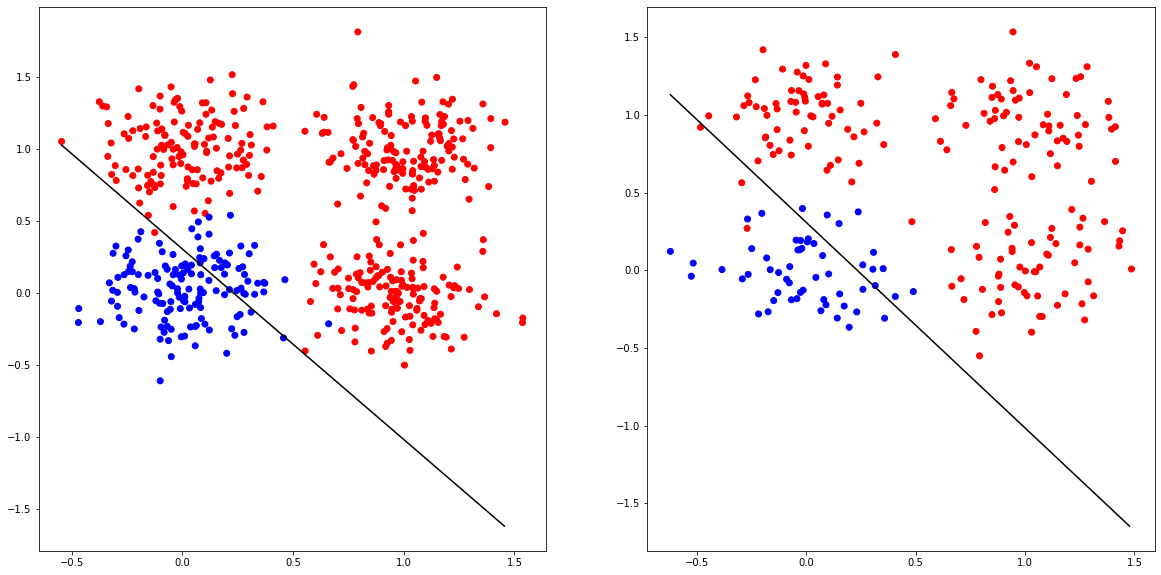

In [86]:
# Criando a lista de cores
cores = criar_cores(y_treino)

# Cálculo dos coeficientes da linha de decisão
a = pesos[0]/pesos[2]
b = -1 * (pesos[1]/pesos[2])
# Criando os pontos da linha de decisão
x, y = [], []
menor = min(x_treino[:,1])
maior = max(x_treino[:,1])

for i in np.arange(menor, maior, 0.1):
    x.append(i)
    valor = a + b*(i)
    y.append(valor)


# Criação do gráfico
plt.rcParams['figure.figsize']=(20, 10)
    
plt.subplot(1, 2, 1)
plt.plot(x, y, color="black", markersize=100)
plt.scatter(x_treino[:,1], x_treino[:,2], marker='o',color=cores)


# Criando a lista de cores
cores = criar_cores(y_teste)

# Cálculo dos coeficientes da linha de decisão
a = pesos[0]/pesos[2]
b = -1 * (pesos[1]/pesos[2])
# Criando os pontos da linha de decisão
x, y = [], []
menor = min(x_teste[:,1])
maior = max(x_teste[:,1])

for i in np.arange(menor, maior, 0.1):
    x.append(i)
    valor = a + b*(i)
    y.append(valor)
    

plt.subplot(1, 2, 2)
plt.plot(x, y, color="black", markersize=100)
plt.scatter(x_teste[:,1], x_teste[:,2], marker='o',color=cores)
plt.show()